### Clone utilities

In [ ]:
!git clone https://github.com/marcin119a/lstm-pycbc.git
%cd lstm-pycbc

Cloning into 'lstm-pycbc'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 199 (delta 15), reused 28 (delta 8), pack-reused 163
Receiving objects: 100% (199/199), 10.75 MiB | 30.41 MiB/s, done.
Resolving deltas: 100% (93/93), done.
/content/lstm-pycbc


In [ ]:
%%capture
!pip install -r requirements.txt

### Generate dataset, m1 -- first mass of black hole, m2 -- second mass of black hole, -n  -- numbers of signals, -time_steps -- lengh of signal

In [ ]:
!python dump_dataset.py -m1=10 -m2=20 -n=100 -time_steps=1200

|===========================================| 1.3k/1.3k (100.00%)         0s
2020-09-21 14:21:59.290314: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


### Import dataset


In [ ]:
import hickle as hkl


array_hkl = hkl.load('/content/lstm-pycbc/data/D-SET-norm(100,1200).hkl')
X = array_hkl.get('xtrain')
y = array_hkl.get('ytrain')
X = X.reshape(X.shape[0], X.shape[2], 1)

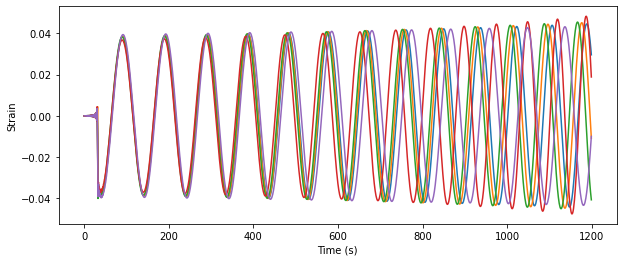

In [ ]:
import pylab 
pylab.figure(figsize=(10,4))
for x in range(0,5):
  pylab.plot(X_train[x])
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import keras.optimizers as optim
from keras.regularizers import l1,l2

def create_model(activation='tanh', lr=1e-3, reg=0.0, dropout=0.0):
  n_steps_in, n_steps_out = X_train.shape[1], 2
  n_features = 1
  model = Sequential()
  model.add(LSTM(200, activation=activation, dropout = dropout, kernel_regularizer = l2(reg), return_sequences=True, batch_input_shape=(None, n_steps_in, n_features)))
  model.add(LSTM(200, activation=activation, dropout = dropout, kernel_regularizer = l2(reg)))
  model.add(Dense(n_steps_out, kernel_regularizer = l2(reg)))
  model.compile(optimizer='adam', loss='mse')
  
  return model

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

kfold=KFold(10, True, 7)
cvscores = []



for train, test in kfold.split(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0, shuffle=False)
    score = model.evaluate(X_test, y_test, verbose=0)

    print("%s: %.2f%%" % (model.metrics_names[0], score*100))
    cvscores.append(score * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))



loss: 1.59%
loss: 2.00%
loss: 1.69%
loss: 1.52%
loss: 1.56%
loss: 1.61%
loss: 1.54%
loss: 1.61%
loss: 1.54%
loss: 1.64%


NameError: ignored